In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('GlobalDietaryDatabase_V2.csv')

In [4]:
#Display dimensions of the dataframe(df)
data.shape

(185, 75)

In [5]:
#Display summary information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           185 non-null    int64  
 1   Entity                                               185 non-null    object 
 2   superregion2                                         185 non-null    object 
 3   iso3                                                 185 non-null    object 
 4   Fruits                                               185 non-null    float64
 5   Non-starchy vegetables                               185 non-null    float64
 6   Potatoes                                             185 non-null    float64
 7   Other starchy vegetables                             185 non-null    float64
 8   Beans and legumes                                    185 non-null    f

In [6]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
0,1,Afghanistan,SAARC,AFG,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,...,1,48,27,76,222,134,3,1,0,1
1,2,Angola,SSA,AGO,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,...,28,106,14,112,267,135,0,85,4,2
2,3,Albania,FSU,ALB,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,...,16,263,211,393,297,308,2,83,1,19
3,4,United Arab Emirates,MENA,ARE,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,...,48,353,106,176,718,223,34,36,6,9
4,5,Argentina,LAC,ARG,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,...,11,601,52,91,552,400,3,125,NaN,NaN


In [7]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0                                        0
Entity                                            0
superregion2                                      0
iso3                                              0
Fruits                                            0
                                                 ..
Supply_ Sweets and sugars                         6
Supply_ Spices and condiments                     6
Supply_ Beverages                                 6
Supply_ Foods for particular nutritional uses    14
Supply_ Miscellaneous                            16
Length: 75, dtype: int64


# **DATA CLEANING**

In [8]:
#Make a copy of the dataframe(df) to be cleaned
df_cleaned = data.copy()

In [9]:
#Remove unnecessary columns
columns_to_drop = ['Unnamed: 0'] + [col for col in data.columns if col.startswith('Supply_')]
df_cleaned = data.drop(columns=columns_to_drop)

#Handle missing values. For simplicity, we'll fill missing values with the mean of their respective columns.
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

#Check if there's any remaining missing value that wasn't handled (e.g., non-numeric columns).
missing_values_check = df_cleaned.isnull().sum()

#Check data types for a brief overview.
data_types = df_cleaned.dtypes

(df_cleaned.head(), missing_values_check, data_types)

(                 Entity superregion2 iso3      Fruits  Non-starchy vegetables  \
 0           Afghanistan        SAARC  AFG   65.697036               98.080124   
 1                Angola          SSA  AGO  119.746980              308.837004   
 2               Albania          FSU  ALB  138.874360              129.083757   
 3  United Arab Emirates         MENA  ARE  107.577820              123.284747   
 4             Argentina          LAC  ARG   93.995787              123.803276   
 
      Potatoes  Other starchy vegetables  Beans and legumes  Nuts and seeds  \
 0   21.195808                 44.892140         103.830266       31.205695   
 1  346.377109                 52.662482          37.799557       11.612246   
 2  185.783632                 73.031694          40.181361       12.272771   
 3  182.972287                 57.068126          40.563807       31.729379   
 4   51.336122                  7.010755           3.575009        1.564769   
 
    Refined grains  ...      Z

In [10]:
df_cleaned.columns

Index(['Entity', 'superregion2', 'iso3', 'Fruits', 'Non-starchy vegetables',
       'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
       'Nuts and seeds', 'Refined grains', 'Whole grains',
       'Total processed meats', 'Unprocessed red meats', 'Total seafoods',
       'Eggs', 'Cheese', 'Yoghurt (including fermented milk)',
       'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea',
       'Total carbohydrates', 'Total protein', 'Saturated fat',
       'Monounsaturated fatty acids', 'Total omega-6 fat',
       'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber',
       'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron',
       'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
       'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6',
       'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Continen

In [11]:
# Define dictionary of old and new column names
column_name_mapping = {
    'Entity': 'Country',
    'Population (2021)': 'Population', 'Gross National Income Per Capita (2021)': 'Gross Income Per Capita'
}

# Rename the columns
df_cleaned = df_cleaned.rename(columns=column_name_mapping)

# **DATA EXPLORATION**

In [12]:
#Display column names
df_cleaned.columns

Index(['Country', 'superregion2', 'iso3', 'Fruits', 'Non-starchy vegetables',
       'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
       'Nuts and seeds', 'Refined grains', 'Whole grains',
       'Total processed meats', 'Unprocessed red meats', 'Total seafoods',
       'Eggs', 'Cheese', 'Yoghurt (including fermented milk)',
       'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea',
       'Total carbohydrates', 'Total protein', 'Saturated fat',
       'Monounsaturated fatty acids', 'Total omega-6 fat',
       'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber',
       'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron',
       'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
       'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6',
       'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Contine

In [13]:
# Group columns into 3 meaningful categories
meaningful_categories = {
    '1. Health and Demographic Information': ['Country', 'superregion2', 'iso3','Year', 'Diabetes prevalence (% of population ages 20 to 79)',
                                           'Continent', 'ObesityRate', 'Population',
                                           'Gross Income Per Capita', 'Unit'],
    '2. Food Groups': ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables',
                    'Beans and legumes', 'Nuts and seeds', 'Refined grains', 'Whole grains',
                    'Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs',
                    'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
                    'Fruit juices', 'Coffee', 'Tea', 'Total Milk'],
    '3. Nutritional Content': ['Total carbohydrates', 'Total protein', 'Saturated fat',
                            'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat',
                            'Plant omega-3 fat', 'Dietary fiber', 'Added sugars', 'Calcium',
                            'Dietary sodium', 'Iodine', 'Iron', 'Magnesium', 'Potassium', 'Selenium',
                            'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
                            'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C',
                            'Vitamin D', 'Vitamin E', 'Zinc']
}

# Print the defined categories
for category, columns in meaningful_categories.items():
    print(category, ':', columns)

1. Health and Demographic Information : ['Country', 'superregion2', 'iso3', 'Year', 'Diabetes prevalence (% of population ages 20 to 79)', 'Continent', 'ObesityRate', 'Population', 'Gross Income Per Capita', 'Unit']
2. Food Groups : ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes', 'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea', 'Total Milk']
3. Nutritional Content : ['Total carbohydrates', 'Total protein', 'Saturated fat', 'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12'

# **1. Health and Demographic**

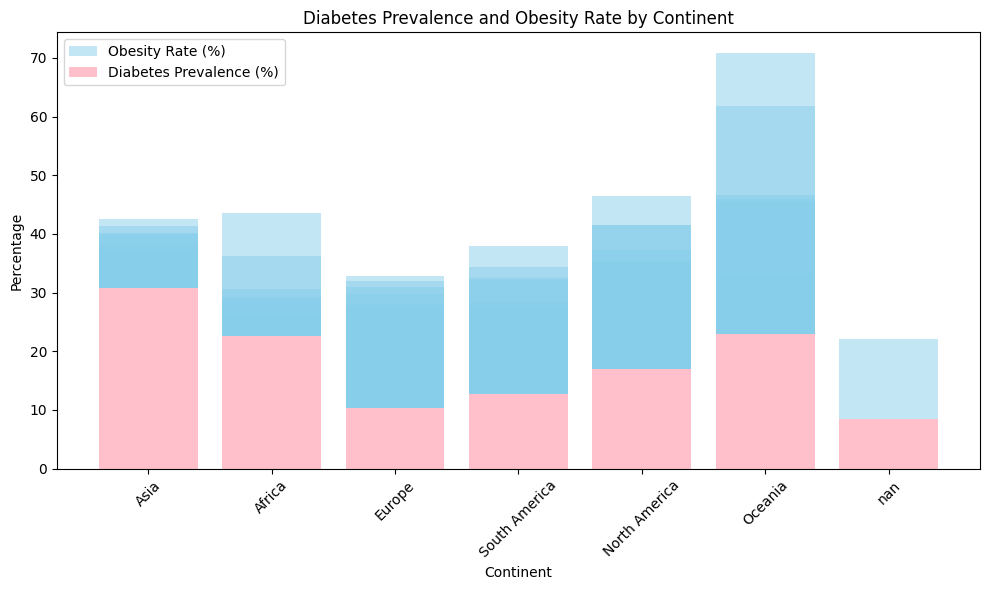

In [14]:
# Convert 'Continent' column to strings
df_cleaned['Continent'] = df_cleaned['Continent'].astype(str)

# Now, plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_cleaned['Continent'], df_cleaned['ObesityRate'], color='skyblue', label='Obesity Rate (%)', alpha=0.5)
plt.bar(df_cleaned['Continent'], df_cleaned['Diabetes prevalence (% of population ages 20 to 79)'], color='pink', label='Diabetes Prevalence (%)')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Diabetes Prevalence and Obesity Rate by Continent')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


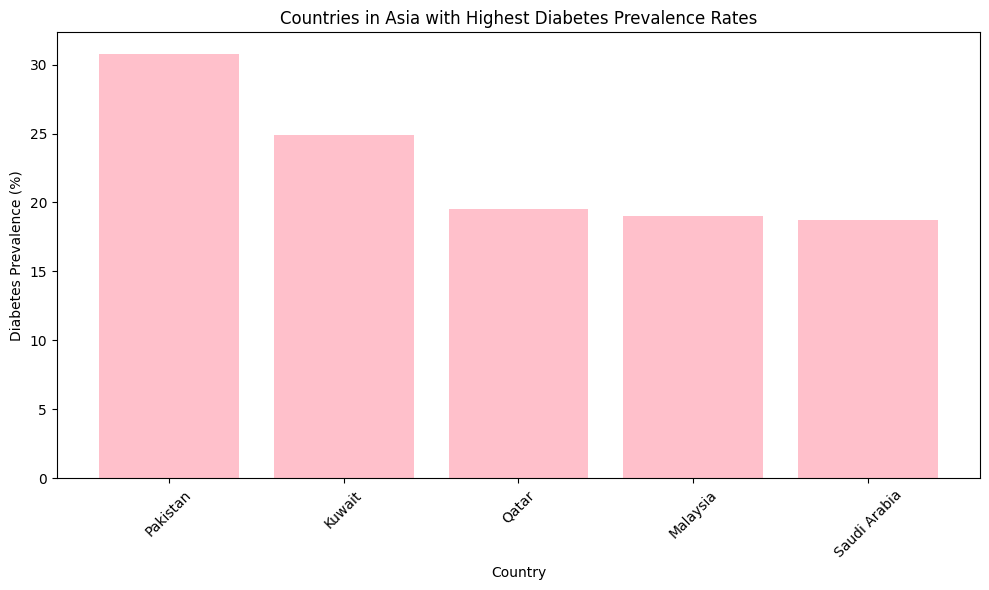

In [15]:
#Identify countries in Asia continent with high diabetes and high obesity rates

# Filter countries in the Asia continent
asia_df = df_cleaned[df_cleaned['Continent'] == 'Asia']

# Sort by diabetes prevalence rates in descending order
asia_df_sorted = asia_df.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)

# Select top countries with the highest diabetes prevalence rates
top_countries = asia_df_sorted.head(5)  # Change 5 to the desired number of top countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['Diabetes prevalence (% of population ages 20 to 79)'], color='pink')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Diabetes Prevalence (%)')
plt.title('Countries in Asia with Highest Diabetes Prevalence Rates')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

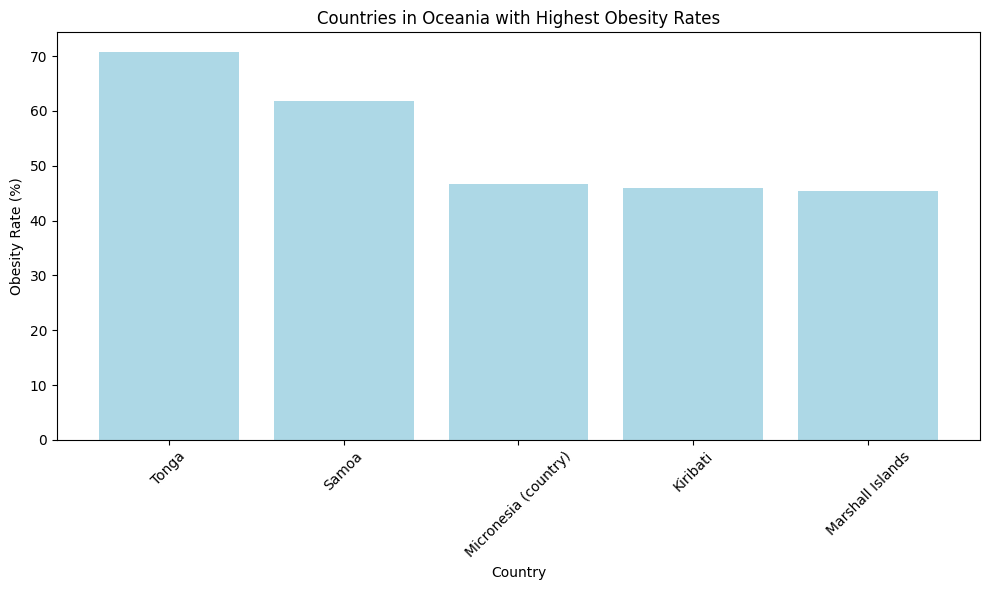

In [16]:
# Filter countries in the Oceania continent
oceania_df = df_cleaned[df_cleaned['Continent'] == 'Oceania']

# Sort by obesity rates in descending order
oceania_df_sorted = oceania_df.sort_values(by='ObesityRate', ascending=False)

# Select top countries with the highest obesity rates
top_countries = oceania_df_sorted.head(5)  # Change 5 to the desired number of top countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['ObesityRate'], color='lightblue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Obesity Rate (%)')
plt.title('Countries in Oceania with Highest Obesity Rates')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

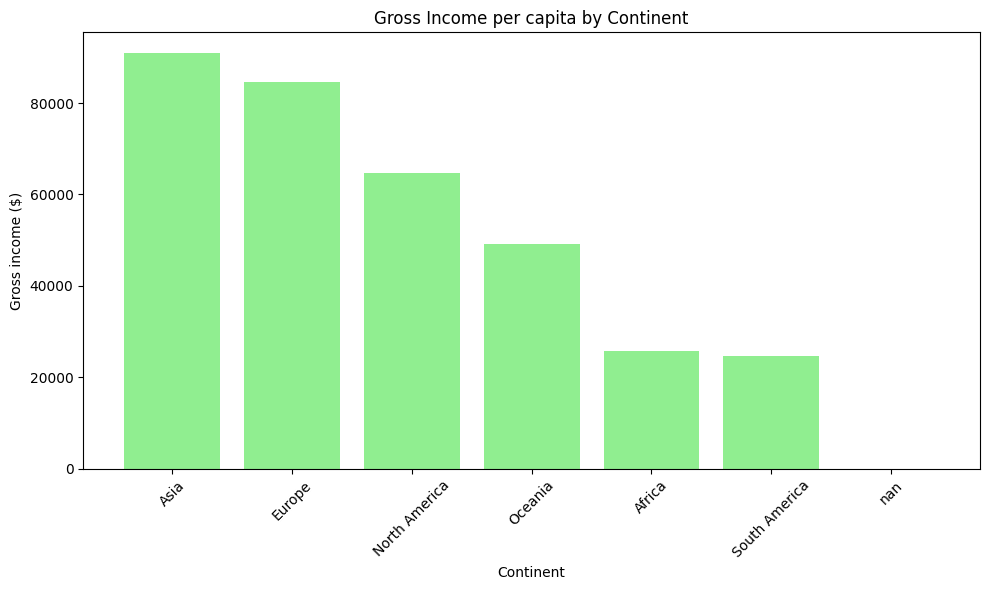

In [17]:
# View of gross income per capita by continent
df_sorted = df_cleaned.sort_values(by='Gross Income Per Capita', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Continent'], df_sorted['Gross Income Per Capita'], color='LightGreen')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Gross income ($)')
plt.title('Gross Income per capita by Continent')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

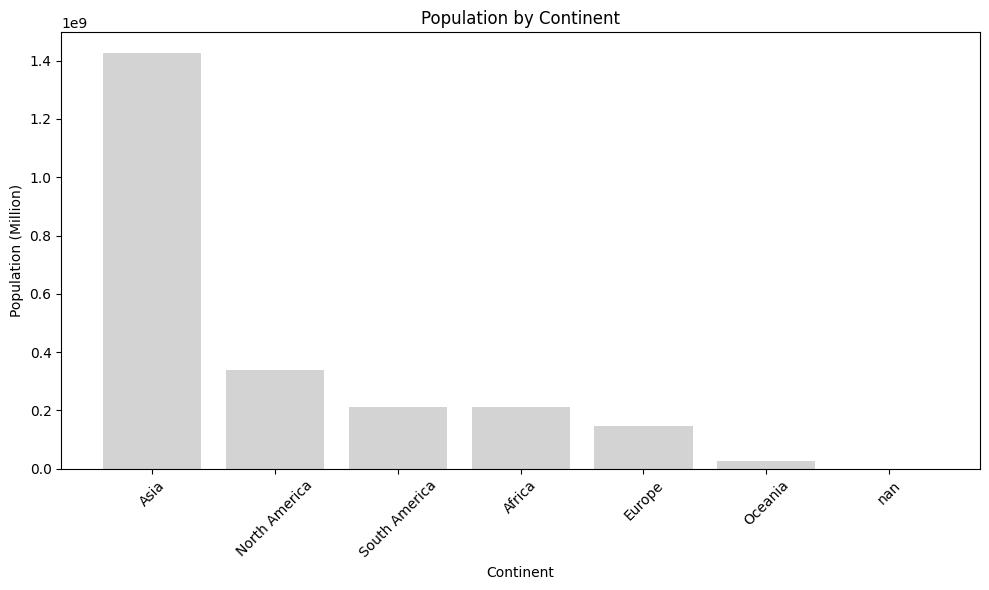

In [18]:
# View of population by continent
df_sorted = df_cleaned.sort_values(by='Population', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Continent'], df_sorted['Population'], color='LightGrey')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Population (Million)')
plt.title('Population by Continent')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **2. Food Groups**

In [19]:
# Grouping foods into categories
Protein = ['Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)','Sugar-sweetened beverages','Coffee', 'Tea',]
Dairy = ['Total Milk']
Cereal = ['Refined grains', 'Whole grains']
Fruits_Vegetables = ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes', 'Nuts and seeds', 'Fruit juices']

# Calculate total intake for each food group
df_cleaned['Protein'] = df_cleaned[Protein].sum(axis=1)
df_cleaned['Dairy'] = df_cleaned[Dairy].sum(axis=1)
df_cleaned['Cereals'] = df_cleaned[Cereal].sum(axis=1)
df_cleaned['Fruit & Vegetables'] = df_cleaned[Fruits_Vegetables].sum(axis=1)

# Drop individual food columns
df_cleaned.drop(columns=Protein + Cereal + Fruits_Vegetables, inplace=True)

# Display the modified DataFrame
print(df_cleaned)

                  Country superregion2 iso3  Total carbohydrates  \
0             Afghanistan        SAARC  AFG            67.476128   
1                  Angola          SSA  AGO            60.115130   
2                 Albania          FSU  ALB            50.320140   
3    United Arab Emirates         MENA  ARE            58.226582   
4               Argentina          LAC  ARG            49.462134   
..                    ...          ...  ...                  ...   
180                 Samoa         Asia  WSM            58.415538   
181                 Yemen         MENA  YEM            58.199504   
182          South Africa          SSA  ZAF            56.716201   
183                Zambia          SSA  ZMB            60.065839   
184              Zimbabwe          SSA  ZWE            60.905160   

     Total protein  Saturated fat  Monounsaturated fatty acids  \
0        59.150274       7.489211                     5.013865   
1        37.814544      10.663588                  

# **1.Correlation**
**1.Relationship between food and lifestyle diseases**

In [20]:
df_cleaned.columns

Index(['Country', 'superregion2', 'iso3', 'Total carbohydrates',
       'Total protein', 'Saturated fat', 'Monounsaturated fatty acids',
       'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
       'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine',
       'Iron', 'Magnesium', 'Potassium', 'Selenium',
       'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
       'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C',
       'Vitamin D', 'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Continent',
       'ObesityRate', 'National Dish', 'Population', 'Gross Income Per Capita',
       'Unit', 'Protein', 'Dairy', 'Cereals', 'Fruit & Vegetables'],
      dtype='object')

In order to demonstrate the connection between food and lifestyle diseases in Tonga and Pakistan, we can emphasize the nutritional factors and rates of lifestyle diseases in these nations. We are able to choose important columns like dietary elements and rates of disease, and then conduct a comparison for these two nations.


<Figure size 1200x600 with 0 Axes>

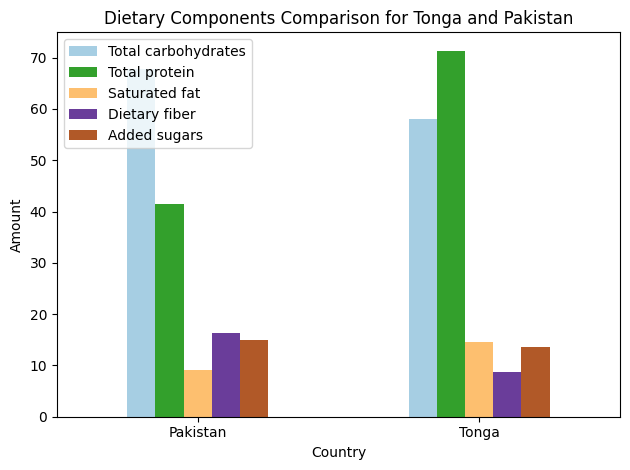

<Figure size 1200x600 with 0 Axes>

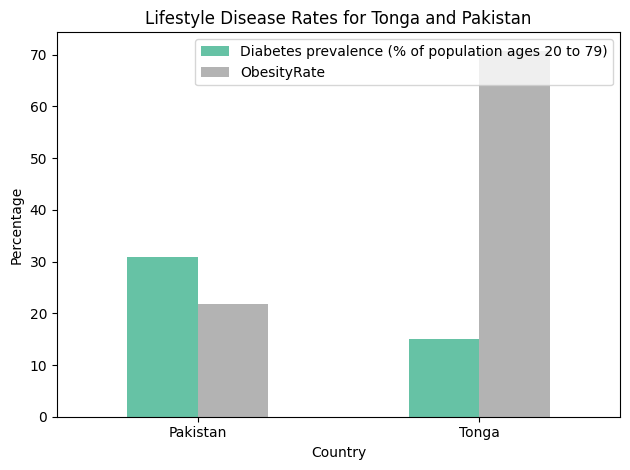

In [21]:
#Show relationship between food and lifestyle disease for Tonga and Pakistan having the highest rates
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for Tonga and Pakistan
tonga_pakistan_data = df_cleaned[df_cleaned['Country'].isin(['Tonga', 'Pakistan'])]

# Select relevant columns for analysis
relevant_columns = ['Country', 'Total carbohydrates', 'Total protein', 'Saturated fat',
                    'Dietary fiber', 'Added sugars', 'Diabetes prevalence (% of population ages 20 to 79)',
                    'ObesityRate']

tonga_pakistan_data = tonga_pakistan_data[relevant_columns]

# Set the country column as index for better plotting
tonga_pakistan_data.set_index('Country', inplace=True)

# Plotting dietary components
plt.figure(figsize=(12, 6))
tonga_pakistan_data.drop(['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'], axis=1).plot(kind='bar', colormap='Paired')
plt.title('Dietary Components Comparison for Tonga and Pakistan')
plt.ylabel('Amount')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting lifestyle disease rates
plt.figure(figsize=(12, 6))
tonga_pakistan_data[['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].plot(kind='bar', colormap='Set2')
plt.title('Lifestyle Disease Rates for Tonga and Pakistan')
plt.ylabel('Percentage')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Based on the charts produces, it is clear that Tonga has significantly higher values for most of these components compared to Pakistan, especially for total carbohydrates and total protein.

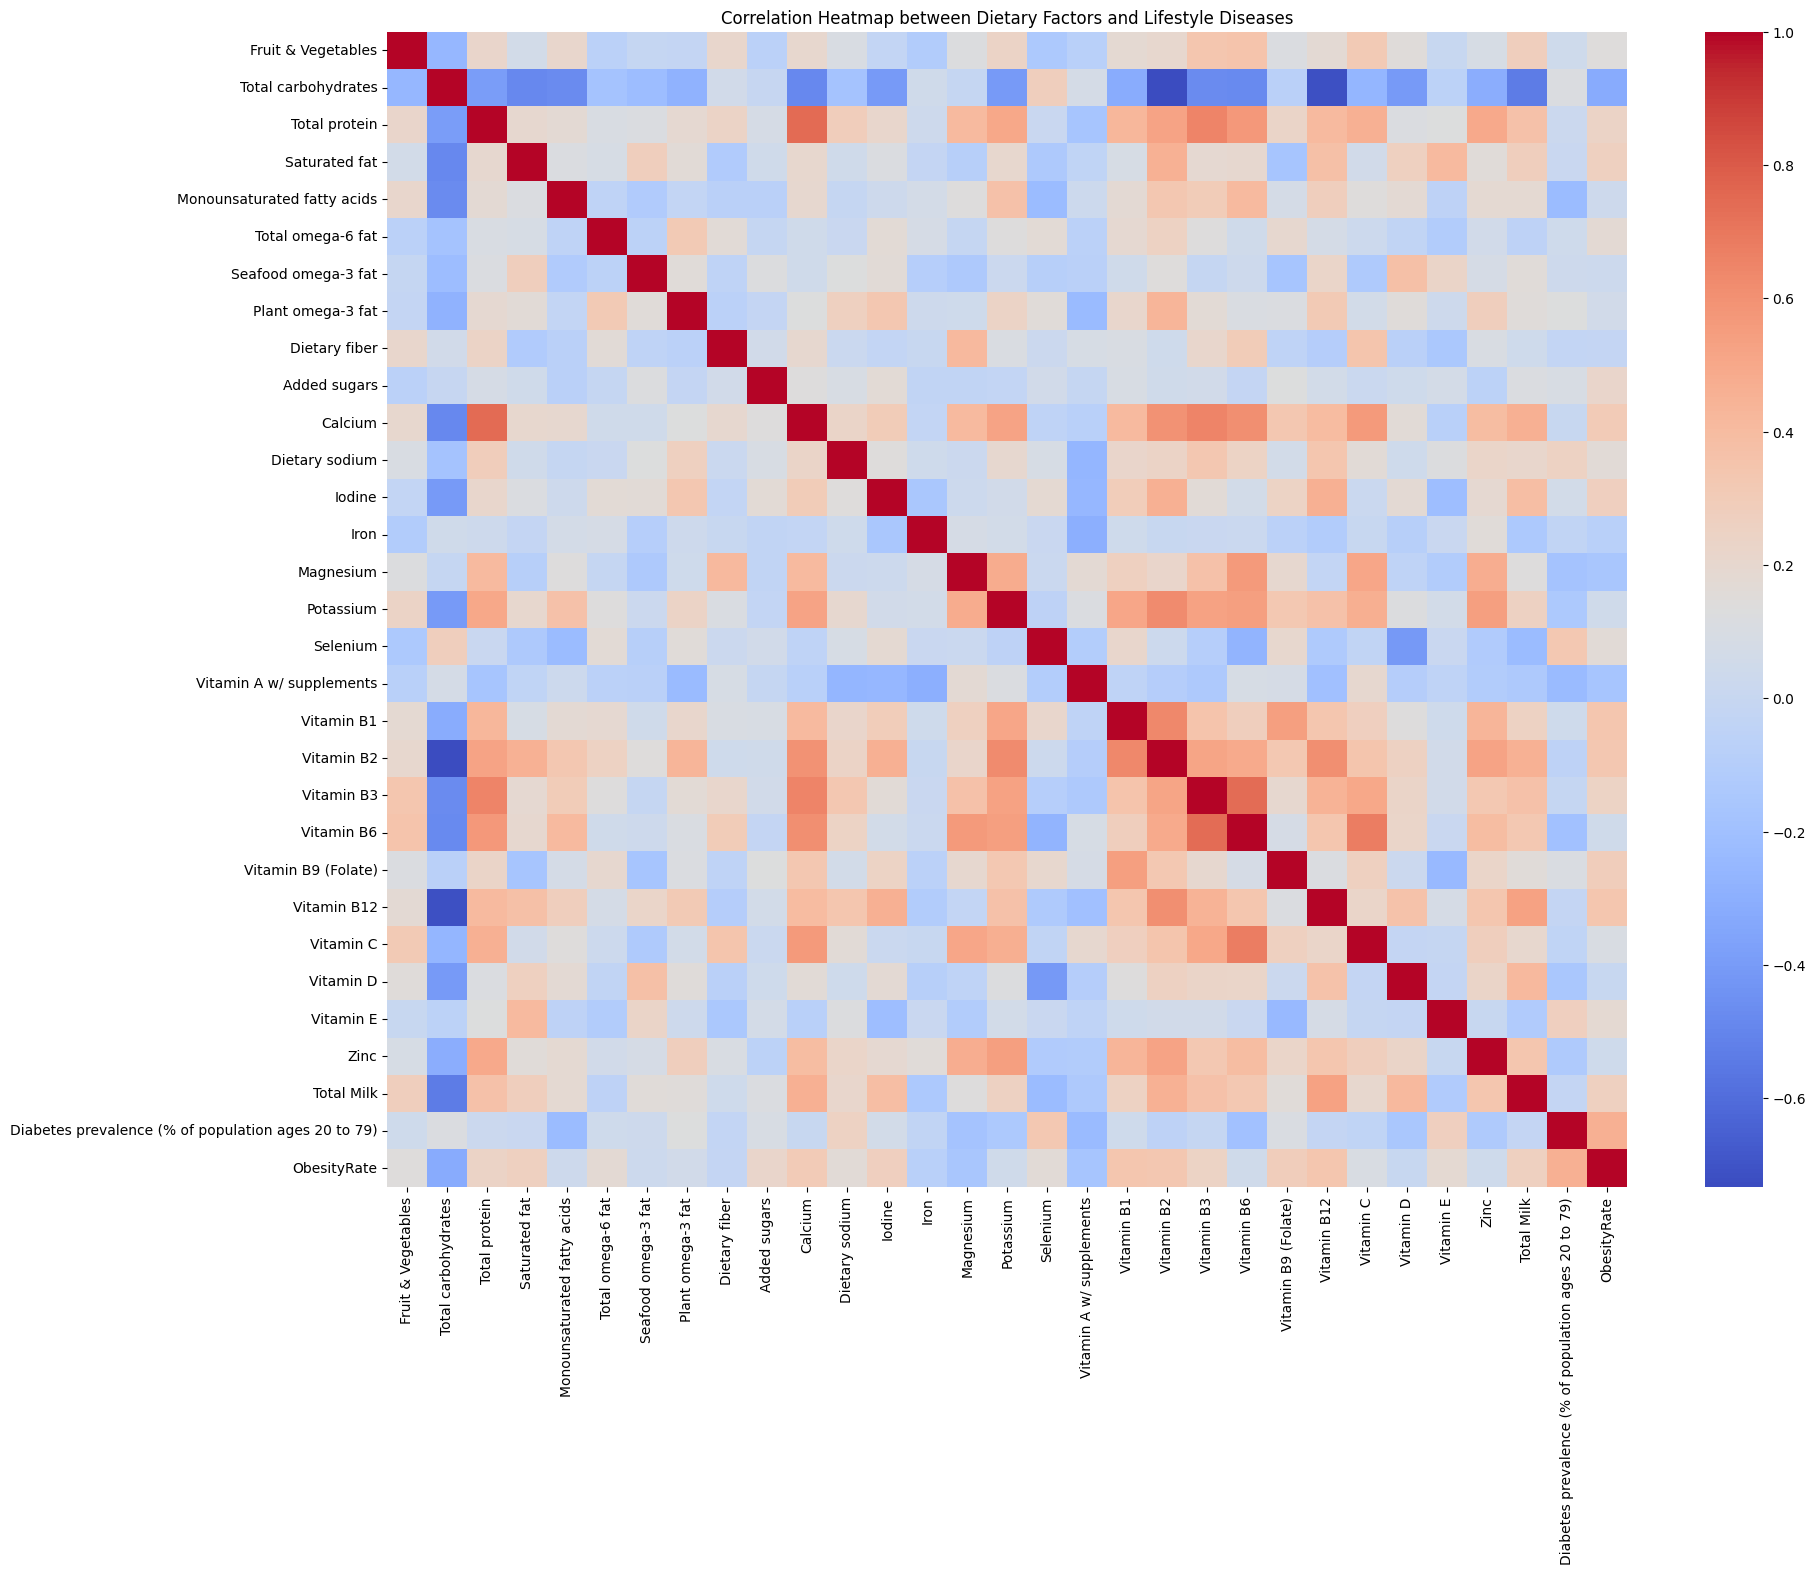

,Diabetes prevalence (% of population ages 20 to 79),ObesityRate
ObesityRate,0.458911,1.000000
Diabetes prevalence (% of population ages 20 to 79),1.000000,0.458911
Vitamin B1,0.043930,0.338809
Vitamin B12,-0.021957,0.337575
Vitamin B2,-0.054173,0.336133
Calcium,0.000519,0.303470
Vitamin B9 (Folate),0.108050,0.287397
Iodine,0.063734,0.274043
Saturated fat,0.005966,0.264571
Total Milk,-0.020281,0.262481


In [22]:
relevant_columns = [
    'Fruit & Vegetables', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine',
    'Iron', 'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
    'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6', 'Vitamin B9 (Folate)',
    'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc', 'Total Milk',
    'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'
]


df_for_correlation = df_cleaned[relevant_columns]

# Calculating correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between Dietary Factors and Lifestyle Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


correlation_with_diseases = correlation_matrix[['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].sort_values(by='ObesityRate', ascending=False)
correlation_with_diseases

Obesity rate shows a moderate positive relationship with different dietary elements like saturated fat, added sugars, and total protein. Likewise, diabetes prevalence demonstrates comparable associations with these factors. Selenium shows a moderate positive association with both obesity rate and diabetes prevalence. Additional research is needed to establish causality despite the insights provided by correlations between diet and lifestyle diseases.


# 2. **Geographical variation in lifestyle diseases**


*   **Continents with the Highest Levels of Diabetes Prevalence and obesity**




<ipython-input-23-7f6c25d63d7e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
<ipython-input-23-7f6c25d63d7e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')


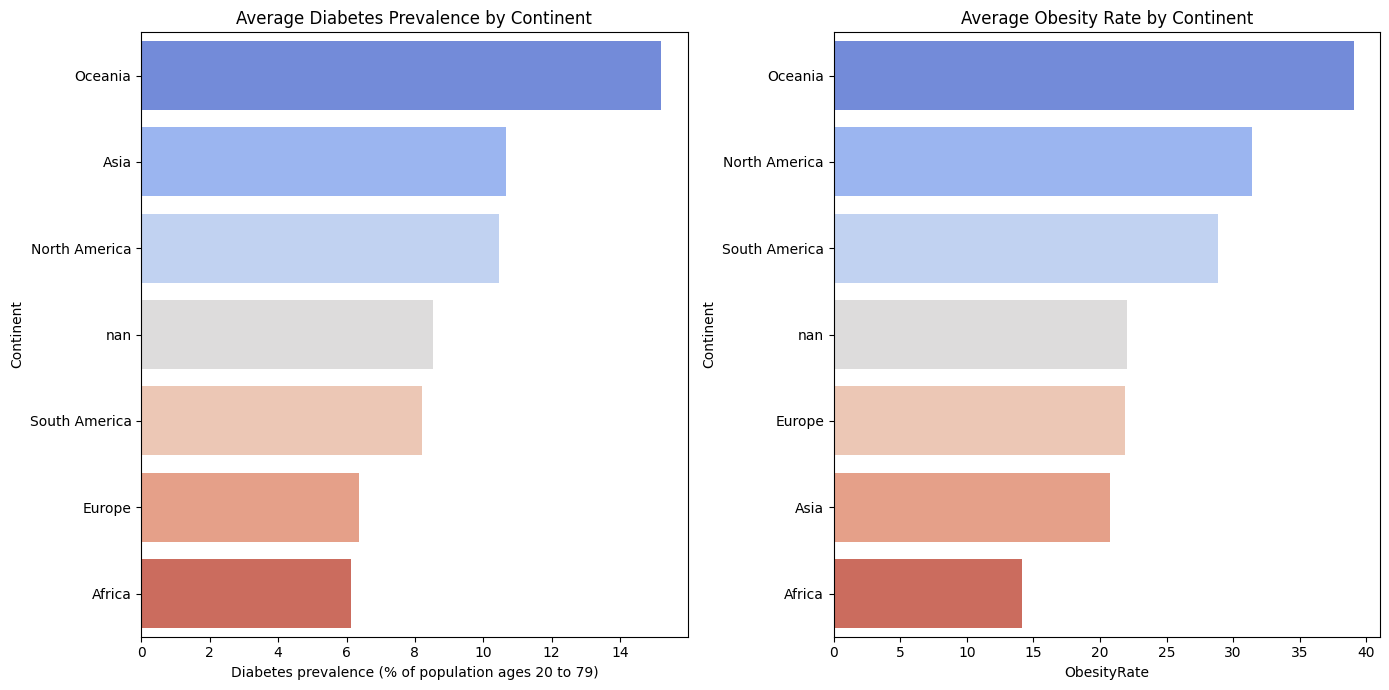

(       Continent  Diabetes prevalence (% of population ages 20 to 79)  \
 4        Oceania                                          15.209091     
 1           Asia                                          10.676087     
 3  North America                                          10.450000     
 6            nan                                           8.514674     
 5  South America                                           8.208333     
 2         Europe                                           6.360000     
 0         Africa                                           6.141509     
 
    ObesityRate  
 4    39.084545  
 1    20.790652  
 3    31.413182  
 6    22.010815  
 5    28.871667  
 2    21.877000  
 0    14.170943  ,
        Continent  Diabetes prevalence (% of population ages 20 to 79)  \
 4        Oceania                                          15.209091     
 3  North America                                          10.450000     
 5  South America                      

In [23]:
#Aggregating data by Continent to compare diabetes and obesity rates across continents
continent_aggregate = df_cleaned.groupby('Continent').agg({
    'Diabetes prevalence (% of population ages 20 to 79)': 'mean',
    'ObesityRate': 'mean'
}).reset_index()

#Sorting the data for better visualization
continent_aggregate_sorted_diabetes = continent_aggregate.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
continent_aggregate_sorted_obesity = continent_aggregate.sort_values(by='ObesityRate', ascending=False)

#Plotting
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
plt.title('Average Diabetes Prevalence by Continent')

plt.subplot(1, 2, 2)
sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')
plt.title('Average Obesity Rate by Continent')

plt.tight_layout()
plt.show()

# Displaying the sorted data frames for detailed examination
continent_aggregate_sorted_diabetes, continent_aggregate_sorted_obesity

Oceania has the highest average diabetes prevalence (approximately 15.2%) and the highest obesity rates (approximately 39.1%) among the continents analyzed. This indicates a significant health concern in terms of lifestyle diseases in this region.



*   **Countries with the Highest Levels of Diabetes**



In [24]:
# Extracting countries with the highest diabetes and obesity rates for detailed analysis and Sorting the dataframe by diabetes prevalence and obesity rate
df_sorted_diabetes = df_cleaned.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
df_sorted_obesity = df_cleaned.sort_values(by='ObesityRate', ascending=False)

#top10_diabetes_countries, top10_obesity_countries
#Identify countries with the highest levels of diabetes prevalence and obesity rates
top_diabetes_countries = data.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)
top_obesity_countries = data.sort_values(by='ObesityRate', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)

(top_diabetes_countries, top_obesity_countries)



(               Entity Continent  \
 129          Pakistan      Asia   
 92             Kuwait      Asia   
 108  Marshall Islands   Oceania   
 117         Mauritius    Africa   
 90           Kiribati   Oceania   
 50              Egypt    Africa   
 146   Solomon Islands   Oceania   
 138             Qatar      Asia   
 119          Malaysia      Asia   
 143             Sudan    Africa   
 
      Diabetes prevalence (% of population ages 20 to 79)  ObesityRate  
 129                                               30.8          21.85  
 92                                                24.9          41.30  
 108                                               23.0          45.48  
 117                                               22.6          18.87  
 90                                                22.1          45.98  
 50                                                20.9          43.64  
 146                                               19.8          22.20  
 138              

Tonga and Samoa lead with obesity rates of 70.8% and 61.77%, respectively, highlighting a major public health concern.
Micronesia, Kiribati, and the Marshall Islands also feature prominently, with obesity rates ranging from approximately 45% to 46%.
Outside of Oceania, Egypt, Qatar, and the United States show high obesity rates, with the US at 41.48%.


Focusing deeper into the relationship between dietary patterns, focusing on the consumption of refined grains and sugar-sweetened beverages, and their impact on obesity and diabetes rates.


**Step 1:Visualize the Relationship between Refined Grain Consumption and Diabetes Prevalence**

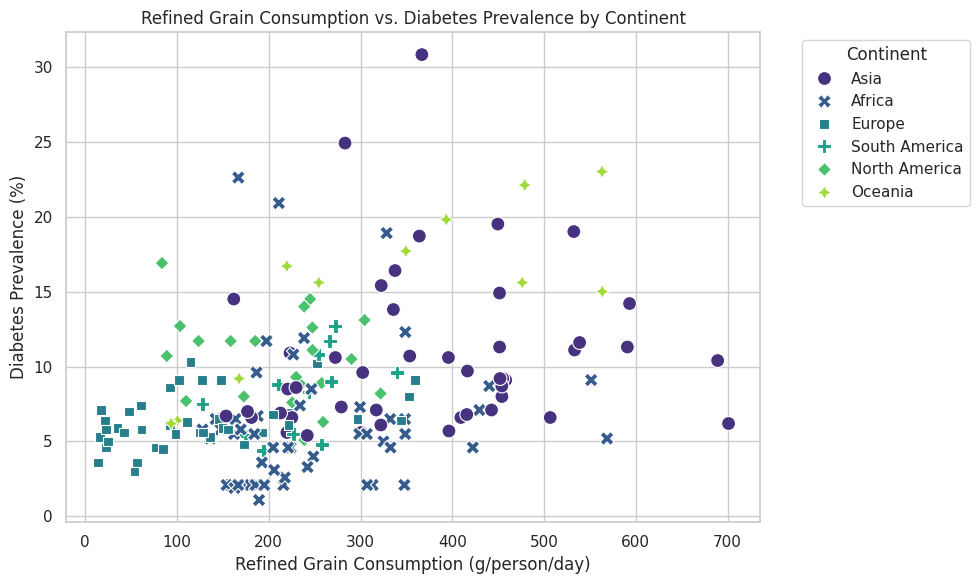

In [25]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot for Refined Grain Consumption vs. Diabetes Prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Refined grains", y="Diabetes prevalence (% of population ages 20 to 79)", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Refined Grain Consumption vs. Diabetes Prevalence by Continent')
plt.xlabel('Refined Grain Consumption (g/person/day)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 **Step 2: Visualize the Relationship between Sugar-Sweetened Beverage Consumption and Obesity Rates**

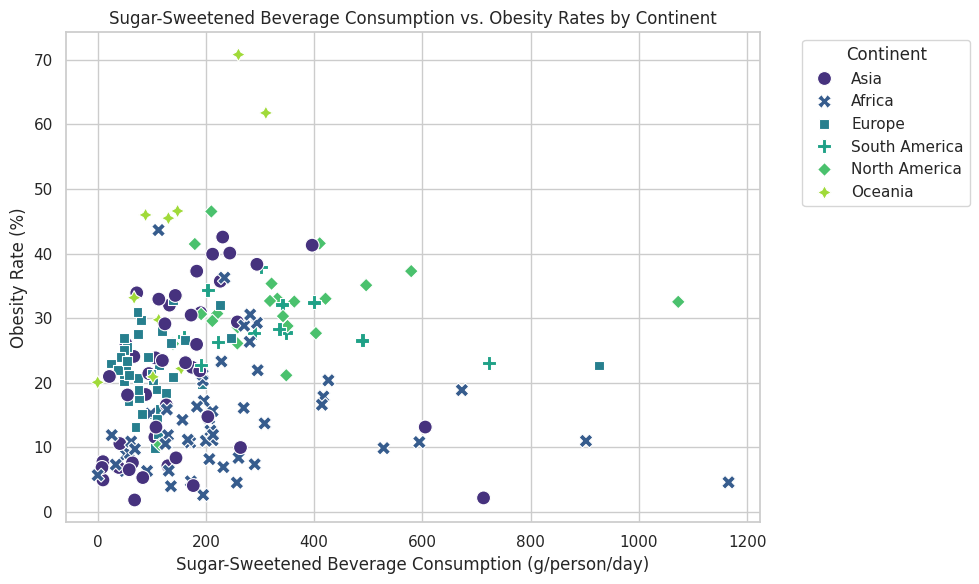

In [26]:
# Scatter plot for Sugar-Sweetened Beverage Consumption vs. Obesity Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Sugar-sweetened beverages", y="ObesityRate", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Sugar-Sweetened Beverage Consumption vs. Obesity Rates by Continent')
plt.xlabel('Sugar-Sweetened Beverage Consumption (g/person/day)')
plt.ylabel('Obesity Rate (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **INCOME AND LIFESTYLE DISEASES**

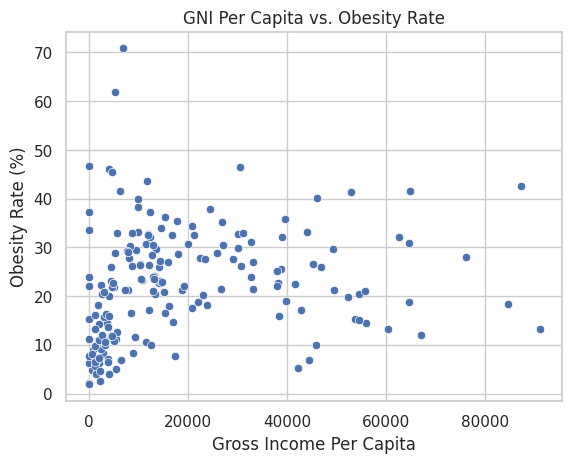

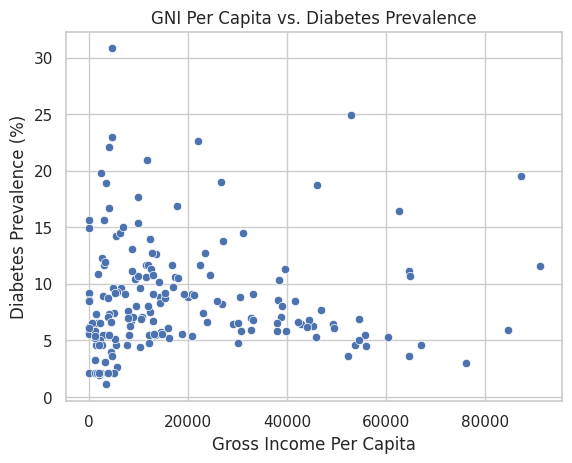

In [27]:
# Scatter plot for GNI vs. Obesity Rate
sns.scatterplot(x='Gross Income Per Capita', y='ObesityRate', data=df_cleaned)
plt.title('GNI Per Capita vs. Obesity Rate')
plt.xlabel('Gross Income Per Capita')
plt.ylabel('Obesity Rate (%)')
plt.show()

# Scatter plot for GNI vs. Diabetes Prevalence
sns.scatterplot(x='Gross Income Per Capita', y='Diabetes prevalence (% of population ages 20 to 79)', data=df_cleaned)
plt.title('GNI Per Capita vs. Diabetes Prevalence')
plt.xlabel('Gross Income Per Capita')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()


Data Distribution: There is a wide distribution of GNI per capita, with most data points congregating toward the lower end of the income scale. This suggests that most countries in this dataset have a lower GNI per capita.

Diabetes Prevalence: Diabetes prevalence varies across countries, with several countries having rates above 20%, which is relatively high.

Correlation:There does not appear to be a clear linear relationship between GNI per capita and diabetes prevalence. While there are countries with low GNI per capita and various diabetes prevalence rates, there's no distinct upward or downward trend that would indicate a strong correlation.

High-Income Countries: A few high-income countries appear to have either a lower or moderate prevalence of diabetes, but there's not enough visible trend to draw a definitive conclusion about the impact of high income on diabetes prevalence.


Lower-Income Countries: Amongst lower-income countries, diabetes prevalence rates are spread out, suggesting that factors other than income may play a significant role in diabetes prevalence.

In [28]:
# Calculate and print Pearson correlation coefficients
obesity_correlation = df_cleaned['Gross Income Per Capita'].corr(df_cleaned['ObesityRate'])
diabetes_correlation = df_cleaned['Gross Income Per Capita'].corr(df_cleaned['Diabetes prevalence (% of population ages 20 to 79)'])

print(f"Correlation between GNI Per Capita and Obesity Rate: {obesity_correlation}")
print(f"Correlation between GNI Per Capita and Diabetes Prevalence: {diabetes_correlation}")


Correlation between GNI Per Capita and Obesity Rate: 0.20244271287994728
Correlation between GNI Per Capita and Diabetes Prevalence: 0.045122384382607954


# **MODELLING**

___

- In our modern lifestyle, dietary habits play a crucial role in determining individuals' health outcomes, particularly regarding chronic diseases such as Diabetes and Obesity. To address this pressing health concern, this notebook presents a predictive model utilizing K-Nearest Neighbors (KNN) Classifier.

- Unlike traditional regression techniques, KNN Classifier offers a non-parametric approach, making it particularly suitable for scenarios where the relationship between dietary factors and disease risk may not follow a specific mathematical form. KNN Classifier classifies new instances based on the majority class of their k-nearest neighbors in the feature space. By leveraging a dataset encompassing individuals' dietary habits and health status, we aim to develop a model capable of predicting the risk of Diabetes and Obesity based on dietary patterns. This model holds promise in providing personalized insights and recommendations, empowering individuals to make informed dietary choices to mitigate the risk of these lifestyle diseases.

In [29]:
import warnings

warnings.filterwarnings('ignore')

In [30]:
# view dimensions of dataset
df=df_cleaned
df_cleaned.shape

(185, 43)

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 43 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              185 non-null    object 
 1   superregion2                                         185 non-null    object 
 2   iso3                                                 185 non-null    object 
 3   Total carbohydrates                                  185 non-null    float64
 4   Total protein                                        185 non-null    float64
 5   Saturated fat                                        185 non-null    float64
 6   Monounsaturated fatty acids                          185 non-null    float64
 7   Total omega-6 fat                                    185 non-null    float64
 8   Seafood omega-3 fat                                  185 non-null    f

In [33]:
df.describe()

,Total carbohydrates,Total protein,Saturated fat,Monounsaturated fatty acids,Total omega-6 fat,Seafood omega-3 fat,Plant omega-3 fat,Dietary fiber,Added sugars,Calcium,...,Total Milk,Year,Diabetes prevalence (% of population ages 20 to 79),ObesityRate,Population,Gross Income Per Capita,Protein,Dairy,Cereals,Fruit & Vegetables
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02,185.000000,...,185.000000,185.0,185.000000,185.000000,1.850000e+02,185.000000,185.000000,185.000000,185.000000,185.000000
mean,56.104519,71.315682,10.965529,12.021877,2.625278,267.567917,906.370441,22.403670,1.089378e+01,645.049737,...,107.937692,2021.0,8.514674,22.010815,4.152630e+07,18576.224442,393.672093,107.937692,296.368105,420.614754
std,6.570588,21.581724,3.182541,3.731789,0.131527,340.970579,410.004187,12.240458,7.253312e+00,248.954420,...,84.512809,0.0,4.859521,11.607717,1.521650e+08,19824.520152,196.992166,84.512809,137.977889,156.043048
min,41.631837,24.846856,2.793937,3.661458,2.225500,0.721324,235.959143,3.496596,1.320000e-66,191.848386,...,8.440791,2021.0,1.100000,1.860000,0.000000e+00,0.000000,29.756715,8.440791,36.781764,127.810018
25%,50.205227,58.989993,9.142350,9.799274,2.566435,58.336618,657.414827,14.040145,5.420423e+00,496.389925,...,50.927941,2021.0,5.500000,12.050000,2.119410e+06,3850.524234,277.376149,50.927941,207.423484,325.441839
50%,57.721467,69.676442,10.936376,11.723876,2.614974,122.774026,808.444186,19.928852,1.034914e+01,595.734212,...,90.906288,2021.0,7.100000,21.850000,8.900059e+06,11961.087920,359.492636,90.906288,271.869733,386.558109
75%,60.328201,82.265448,12.940950,13.690540,2.677164,342.268600,1059.373488,28.622017,1.472476e+01,764.391858,...,137.497572,2021.0,10.600000,29.570000,3.207707e+07,27054.325050,481.653785,137.497572,367.160249,467.220658
max,77.576541,245.654073,28.681348,27.808283,3.219003,2491.126613,2812.125288,67.712504,3.250242e+01,2791.649520,...,631.219746,2021.0,30.800000,70.800000,1.425893e+09,90918.644710,1273.595209,631.219746,734.702079,1202.783111


In [34]:
df.isna().sum()

Country                                                0
superregion2                                           0
iso3                                                   0
Total carbohydrates                                    0
Total protein                                          0
Saturated fat                                          0
Monounsaturated fatty acids                            0
Total omega-6 fat                                      0
Seafood omega-3 fat                                    0
Plant omega-3 fat                                      0
Dietary fiber                                          0
Added sugars                                           0
Calcium                                                0
Dietary sodium                                         0
Iodine                                                 0
Iron                                                   0
Magnesium                                              0
Potassium                      

The target variable for our model will be:

- Diabetes prevalence (% of population ages 20 to 79)

This variable represents the percentage of the population aged 20 to 79 who have been diagnosed with diabetes.

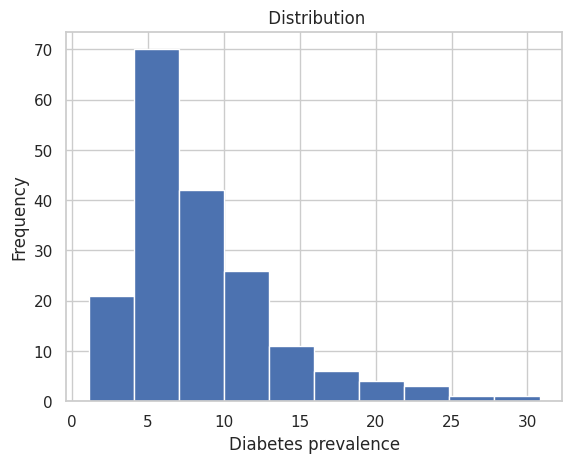

In [35]:
import matplotlib.pyplot as plt
df['Diabetes prevalence (% of population ages 20 to 79)'].hist()
plt.xlabel('Diabetes prevalence')
plt.ylabel('Frequency')
plt.title(' Distribution')
plt.show()

###  Declare feature vector and target variable

In [36]:
X = df.drop(['Diabetes prevalence (% of population ages 20 to 79)'], axis=1)
y = (df['Diabetes prevalence (% of population ages 20 to 79)'] > 7.0).astype(int)

### Divide the data into distinct training and test sets.


In [37]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((129, 42), (56, 42))

the training set comprises 148 instances, each described by 42 features, while the testing set comprises 37 instances, each also described by the same 42 features.

In [39]:
for col in X_train.columns:
    if X_train[col].dtype != 'object':
        missing_percentage = X_train[col].isnull().mean()
        if missing_percentage > 0:
            print(f"{col}: {round(missing_percentage * 100, 2)}%")


In [40]:
categorical_cols_to_drop = ['Country', 'superregion2', 'iso3', 'Continent', 'National Dish', 'Unit']
X_train.drop(categorical_cols_to_drop, axis=1, inplace=True)
X_test.drop(categorical_cols_to_drop, axis=1, inplace=True)
X.drop(categorical_cols_to_drop, axis=1, inplace=True)

In [41]:
X_train.head(4)

,Total carbohydrates,Total protein,Saturated fat,Monounsaturated fatty acids,Total omega-6 fat,Seafood omega-3 fat,Plant omega-3 fat,Dietary fiber,Added sugars,Calcium,...,Zinc,Total Milk,Year,ObesityRate,Population,Gross Income Per Capita,Protein,Dairy,Cereals,Fruit & Vegetables
74,45.997305,59.247357,14.211090,11.093851,2.935431,309.859259,432.851352,9.867902,9.446537,476.000761,...,6.088458,57.922064,2021.0,31.00,9709786,32789.010630,258.362925,57.922064,92.723440,207.752625
151,58.868242,50.985740,12.043490,10.534233,2.715985,293.358763,652.341865,32.407300,2.821183,534.025084,...,8.288404,91.881946,2021.0,15.87,0,4021.350815,261.727516,91.881946,373.719383,289.275319
40,58.383742,79.545355,6.668533,14.144717,2.596825,40.805499,521.664534,7.010948,15.837906,887.368335,...,8.933761,141.939480,2021.0,21.16,11256372,7878.847482,610.967515,141.939480,260.691962,375.641535
106,67.122325,93.505367,6.681228,7.391137,2.525633,1022.400911,735.270313,62.381900,9.520736,509.334478,...,7.831427,166.400968,2021.0,16.57,521457,15448.127880,254.547567,166.400968,598.011418,541.179802


In [42]:
X_test.head(4)

,Total carbohydrates,Total protein,Saturated fat,Monounsaturated fatty acids,Total omega-6 fat,Seafood omega-3 fat,Plant omega-3 fat,Dietary fiber,Added sugars,Calcium,...,Zinc,Total Milk,Year,ObesityRate,Population,Gross Income Per Capita,Protein,Dairy,Cereals,Fruit & Vegetables
33,51.323720,64.683867,4.440165,14.965860,2.633601,117.601283,773.715630,30.063318,2.964090,508.093267,...,5.310247,41.201694,2021.0,14.50,27198628,3620.932408,279.070170,41.201694,367.160249,356.253099
125,47.851771,97.441459,13.550104,12.974175,2.615756,843.746981,1251.295046,16.941082,12.213821,701.917972,...,9.954380,198.570145,2021.0,18.84,5403021,64660.106220,363.292583,198.570145,44.527476,315.401733
173,55.389289,90.209542,11.008491,11.652920,2.610930,66.700559,674.339223,35.403165,16.030753,899.703170,...,13.310422,165.923799,2021.0,32.44,3426260,21268.881220,619.461090,165.923799,306.191914,441.933298
112,59.868670,75.240559,13.249915,8.167484,2.610357,763.896561,1139.084618,18.402978,7.402811,523.790413,...,8.416420,84.878683,2021.0,7.16,53798084,3850.524234,459.338404,84.878683,465.680966,331.905732


We have completed the preparation of both the training and testing sets for model development. Prior to that, it is essential to standardize all the feature variables. Feature scaling is the term used to describe this.

In [43]:
# Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

X_train_scaled.head()


,Total carbohydrates,Total protein,Saturated fat,Monounsaturated fatty acids,Total omega-6 fat,Seafood omega-3 fat,Plant omega-3 fat,Dietary fiber,Added sugars,Calcium,...,Zinc,Total Milk,Year,ObesityRate,Population,Gross Income Per Capita,Protein,Dairy,Cereals,Fruit & Vegetables
0,-1.524261,-0.569671,1.135997,-0.120263,2.310357,0.070892,-1.118457,-1.025199,-0.169053,-0.807972,...,-0.741225,-0.533619,0.0,0.830492,-0.235019,0.794796,-0.589146,-0.533619,-1.481424,-1.500688
1,0.360426,-1.043661,0.420255,-0.279209,0.670789,0.026065,-0.598149,0.854973,-1.071616,-0.509231,...,0.042150,-0.128476,0.0,-0.503377,-0.288955,-0.702906,-0.572936,-0.128476,0.544158,-0.899145
2,0.289481,0.594878,-1.354559,0.746261,-0.219502,-0.660036,-0.907923,-1.263518,0.701635,1.309974,...,0.271954,0.468713,0.0,-0.037007,-0.226428,-0.502077,1.109608,0.468713,-0.270609,-0.261862
3,1.569068,1.395800,-1.350367,-1.171930,-0.751401,2.006624,-0.401565,3.355368,-0.158945,-0.636352,...,-0.120574,0.760539,0.0,-0.441664,-0.286058,-0.108005,-0.607527,0.760539,2.160985,0.959618
4,-0.517706,1.395590,-0.223205,-0.304525,0.804278,-0.480101,2.478019,0.552850,0.245332,-0.423788,...,1.311635,0.950913,0.0,0.491074,0.896444,-0.164140,-0.205948,0.950913,-0.588429,-0.414840


## 1.  SVM classifier

### Model Training

In [44]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svm_classifier = SVC()

# Fit the classifier on your training data
svm_classifier.fit(X_train_scaled, y_train)

SVC()

After training the SVM model, you can proceed with making predictions on the scaled testing data

### Evaluation

Accuracy measures the proportion of correctly classified instances out of the total instances.

In [45]:
from sklearn.metrics import accuracy_score

# Predict on the testing data
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


Confusion Matrix provides a breakdown of correct and incorrect predictions for each class.

In [46]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[25  5]
 [ 7 19]]


In [47]:
25+19

44

The confusion matrix shows 25 + 19 = 44 correct predictions and 5 + 7 = 12 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 25
- True Negatives (Actual Negative:0 and Predict Negative:0) - 19
- False Positives (Actual Negative:0 but Predict Positive:1) - 5 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 7 (Type II error)

Precision, Recall, and F1-Score provide a more detailed evaluation of the model's performance, particularly for imbalanced datasets.

In [48]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.79      0.73      0.76        26

    accuracy                           0.79        56
   macro avg       0.79      0.78      0.78        56
weighted avg       0.79      0.79      0.78        56



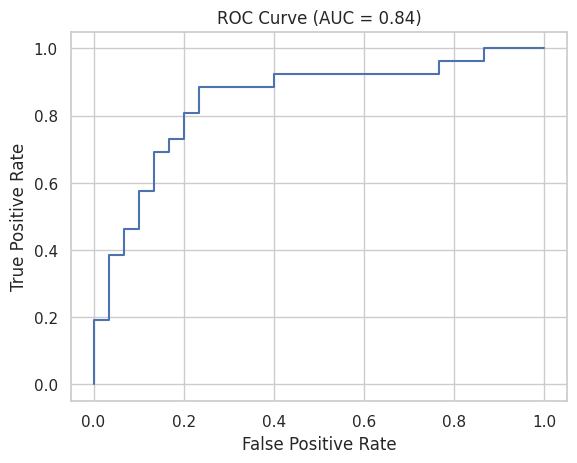

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get decision scores
decision_scores = svm_classifier.decision_function(X_test_scaled)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# Calculate AUC
auc = roc_auc_score(y_test, decision_scores)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

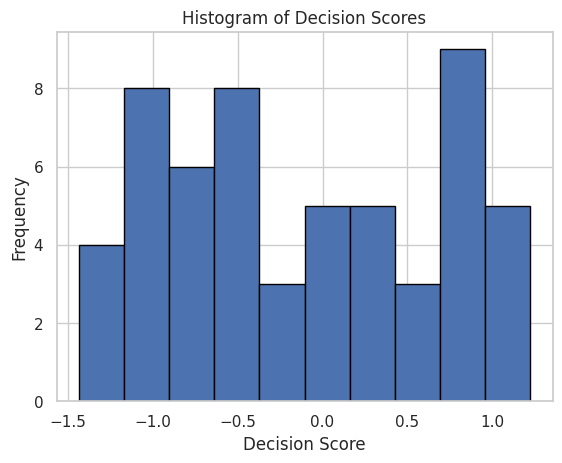

In [50]:
# plot histogram of predicted probabilities

import matplotlib.pyplot as plt

# Get decision scores
decision_scores = svm_classifier.decision_function(X_test_scaled)

# Plot histogram
plt.hist(decision_scores, bins=10, edgecolor='black')
plt.xlabel('Decision Score')
plt.ylabel('Frequency')
plt.title('Histogram of Decision Scores')
plt.show()

In [51]:
train_accuracy = svm_classifier.score(X_train_scaled, y_train)
print("Accuracy on Training Set:", train_accuracy)

test_accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy on Test Set:", test_accuracy)

Accuracy on Training Set: 0.9457364341085271
Accuracy on Test Set: 0.7857142857142857


These two values are somewhat comparable. So, there is no question of overfitting.

- The model demonstrated a test set accuracy of **78.57%** showing consistent performance with similar precision and recall values for each class.
- It showed moderate performance in correctly identifying individuals into their risk categories with a precision of **0.78** and recall of **0.83** for class 0 (low risk) and a precision of **0.79** and recall of **0.73** for class 1 (high risk). The model's well-rounded performance is also backed up by a weighted average F1-score of **0.78.**
- These results indicate that the model can effectively assess the likelihood of individuals developing Diabetes or Obesity based on their dietary habits. By providing personalized dietary advice, individuals at higher risk can be targeted with specific interventions to prevent or mitigate the risk of these lifestyle diseases.

## 2. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Predictions
train_preds = logistic_model.predict(X_train_scaled)
test_preds = logistic_model.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_preds))
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_preds))


Training Accuracy: 0.8992248062015504
Testing Accuracy: 0.75

Confusion Matrix (Testing Data):
[[25  5]
 [ 9 17]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.77      0.65      0.71        26

    accuracy                           0.75        56
   macro avg       0.75      0.74      0.74        56
weighted avg       0.75      0.75      0.75        56



## 3. Linear regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()
# Train the model
linear_model.fit(X_train_scaled, y_train)

# Predictions
train_preds = linear_model.predict(X_train_scaled)
test_preds = linear_model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)



Training MSE: 0.10978368658494468
Testing MSE: 0.1649623443838984
Training R-squared: 0.5595683875457896
Testing R-squared: 0.3367667795026855
